<a href="https://colab.research.google.com/github/kooosee/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## openCVを使ってロールプレイのゲームを作る



In [18]:
import numpy as np
import sys
import cv2
from google.colab.patches import cv2_imshow

ルール説明
5種類:◯,□,↘︎,＋,× それぞれ3枚ずつ計15枚のカードを使う。


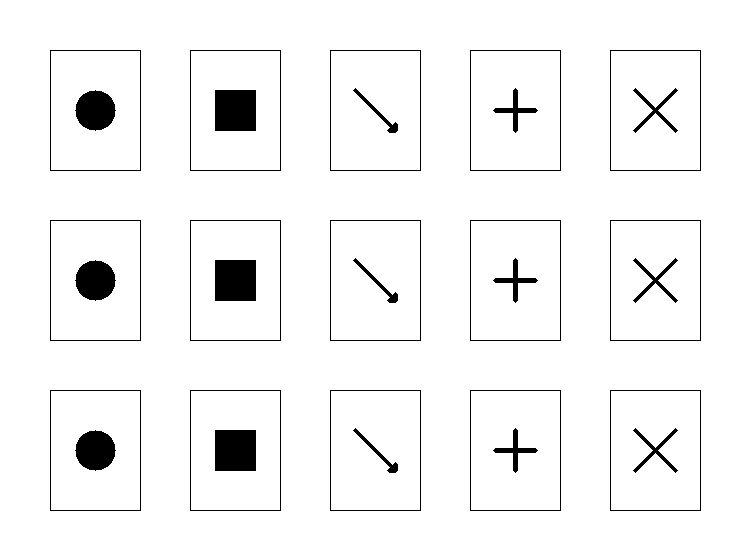

この内から無作為に除かれた1枚のカードのマークを当てる。
ゲーム開始時にお互いにそれぞれ3枚ずつカードが配られ，先手と後手を決めターン毎に交互に除かれたカードのマークを答える。1ターン目のみカードを好きな枚数オープン(相手に見せる)でき，
オープンした枚数新たにカードを得られる。オープンするカードは画面の左側のカードからオープンされる。
先に除かれたカードのマークを当てた方の勝利。
スタート。
先手と後手を決めて，先手にパソコンを渡してください


In [38]:
print('ルール説明\n5種類:◯,□,↘︎,＋,× それぞれ3枚ずつ計15枚のカードを使う。')
img = np.zeros( (560, 750, 3), np.uint8 ) 
img.fill( 255 )
for i in range(5):
  for j in range(3):
     cv2.rectangle(img,(50+140*i,50+170*j),(140+140*i,170+170*j),color=(0,0,0))
for a in range(3):
  cv2.circle(img,(95,110+170*a),20,color=(0),thickness=-1)
  cv2.rectangle(img,(215,90+170*a),(255,130+170*a),color=(0),thickness=-1)
  cv2.arrowedLine(img,(355,90+170*a),(395,130+170*a),color=(0),thickness=3)
  cv2.line(img,(515,90+170*a),(515,130+170*a),color=(0),thickness=3)
  cv2.line(img,(495,110+170*a),(535,110+170*a),color=(0),thickness=3)
  cv2.line(img,(635,90+170*a),(675,130+170*a),color=(0),thickness=3)
  cv2.line(img,(635,130+170*a),(675,90+170*a),color=(0),thickness=3)
cv2_imshow(img)
def make_circle(a,b,c,img):
  cv2.circle(img,(a,b),c,color=(0),thickness=-1)

def make_rectangle(a,b,c,d,img):
  cv2.rectangle(img,(a,b),(c,d),color=(0),thickness=-1)

def make_ya(a,b,c,d,img):
  cv2.arrowedLine(img,(a,b),(c,d),color=(0),thickness=3)

def make_pulus(a,b,c,d,e,f,g,h,img):
  cv2.line(img,(a,b),(c,d),color=(0),thickness=3)
  cv2.line(img,(e,f),(g,h),color=(0),thickness=3)

def make_batsu(a,b,c,d,e,f,g,h,img):
  cv2.line(img,(a,b),(c,d),color=(0),thickness=3)
  cv2.line(img,(e,f),(g,h),color=(0),thickness=3)

print('この内から無作為に除かれた1枚のカードのマークを当てる。\nゲーム開始時にお互いにそれぞれ3枚ずつカードが配られ，先手と後手を決めターン毎に交互に除かれたカードのマークを答える。1ターン目のみカードを好きな枚数オープン(相手に見せる)でき，\nオープンした枚数新たにカードを得られる。オープンするカードは画面の左側のカードからオープンされる。\n先に除かれたカードのマークを当てた方の勝利。')
print('スタート。\n先手と後手を決めて，先手にパソコンを渡してください')

あなたのカード


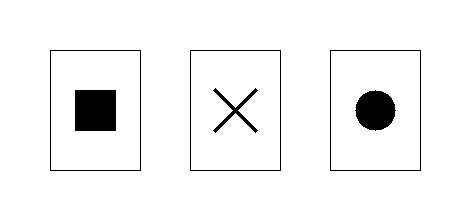

パソコンを渡してください


In [44]:
marklist=['○','□','↘︎','＋','×','○','□','↘︎','＋','×','○','□','↘︎','＋','×']
num=np.random.randint(0,15)
ans=marklist[num]
marklist.pop(num)

menum1=np.random.randint(0,14)
mecard1=marklist[menum1]
marklist.pop(menum1)

menum2=np.random.randint(0,13)
mecard2=marklist[menum2]
marklist.pop(menum2)

menum3=np.random.randint(0,12)
mecard3=marklist[menum3]
marklist.pop(menum3)

younum1=np.random.randint(0,11)
youcard1=marklist[younum1]
marklist.pop(younum1)

younum2=np.random.randint(0,10)
youcard2=marklist[younum2]
marklist.pop(younum2)

younum3=np.random.randint(0,9)
youcard3=marklist[younum3]
marklist.pop(younum3)

print('あなたのカード')
img2 = np.zeros( (220, 470, 3), np.uint8 ) 
img2.fill( 255 )
for i in range(3):
  cv2.rectangle(img2,(50+140*i,50),(140+140*i,170),color=(0))
if mecard1=='○':
  make_circle(95,110,20,img2)
elif mecard1=='□':
  make_rectangle(75,90,115,130,img2)
elif mecard1=='↘︎':
  make_ya(75,90,115,130,img2)
elif mecard1=='＋':
  make_pulus(95,90,95,130,75,110,115,110,img2)
elif mecard1=='×':
  make_batsu(75,90,115,130,115,90,75,130,img2)
if mecard2=='○':
  make_circle(235,110,20,img2)
elif mecard2=='□':
  make_rectangle(215,90,255,130,img2)
elif mecard2=='↘︎':
  make_ya(215,90,255,130,img2)
elif mecard2=='＋':
  make_pulus(235,90,235,130,215,110,255,110,img2)
elif mecard2=='×':
  make_batsu(215,90,255,130,255,90,215,130,img2)
if mecard3=='○':
  make_circle(375,110,20,img2)
elif mecard3=='□':
  make_rectangle(355,90,395,130,img2)
elif mecard3=='↘︎':
  make_ya(355,90,395,130,img2)
elif mecard3=='＋':
  make_pulus(375,90,375,130,355,110,395,110,img2)
elif mecard3=='×':
  make_batsu(355,90,395,130,395,90,355,130,img2)
cv2_imshow(img2)
print('パソコンを渡してください')

あなたのカード


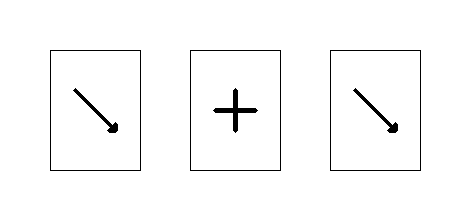

パソコンを渡してください














In [45]:
print('あなたのカード')
img3 = np.zeros( (220, 470, 3), np.uint8 ) 
img3.fill( 255 )
for i in range(3):
  cv2.rectangle(img3,(50+140*i,50),(140+140*i,170),color=(0))
if youcard1=='○':
  make_circle(95,110,20,img3)
elif youcard1=='□':
  make_rectangle(75,90,115,130,img3)
elif youcard1=='↘︎':
  make_ya(75,90,115,130,img3)
elif youcard1=='＋':
  make_pulus(95,90,95,130,75,110,115,110,img3)
elif youcard1=='×':
  make_batsu(75,90,115,130,115,90,75,130,img3)
if youcard2=='○':
  make_circle(235,110,20,img3)
elif youcard2=='□':
  make_rectangle(215,90,255,130,img3)
elif youcard2=='↘︎':
  make_ya(215,90,255,130,img3)
elif youcard2=='＋':
  make_pulus(235,90,235,130,215,110,255,110,img3)
elif youcard2=='×':
  make_batsu(215,90,255,130,255,90,215,130,img3)
if youcard3=='○':
  make_circle(375,110,20,img3)
elif youcard3=='□':
  make_rectangle(355,90,395,130,img3)
elif youcard3=='↘︎':
  make_ya(355,90,395,130,img3)
elif youcard3=='＋':
  make_pulus(375,90,375,130,355,110,395,110,img3)
elif youcard3=='×':
  make_batsu(355,90,395,130,395,90,355,130,img3)
cv2_imshow(img3)
print('パソコンを渡してください\n\n\n\n\n\n\n\n\n\n\n\n')

オープンするカードの枚数を入力してください 1
パソコンを共有してください


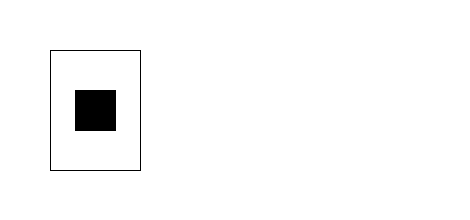

オープンしたカードを見せたらパソコンを先手の人に渡してください


In [46]:
img4 = np.zeros( (220, 470, 3), np.uint8 ) 
img4.fill( 255 )
while True:
  first_open=int(input('オープンするカードの枚数を入力してください '))
  if first_open==0:
    print('オープンしませんでした')
    break
  elif first_open==1:
    print('パソコンを共有してください')
    cv2.rectangle(img4,(50,50),(140,170),color=(0))
    if mecard1=='○':
      make_circle(95,110,20,img4)
    elif mecard1=='□':
      make_rectangle(75,90,115,130,img4)
    elif mecard1=='↘︎':
      make_ya(75,90,115,130,img4)
    elif mecard1=='＋':
      make_pulus(95,90,95,130,75,110,115,110,img4)
    elif mecard1=='×':
      make_batsu(75,90,115,130,115,90,75,130,img4)
    cv2_imshow(img4)
    print('オープンしたカードを見せたらパソコンを先手の人に渡してください')
    break
  elif first_open==2:
    print('パソコンを共有してください')
    for i in range(2):
      cv2.rectangle(img4,(50+140*i,50),(140+140*i,170),color=(0))
    if mecard1=='○':
      make_circle(95,110,20,img4)
    elif mecard1=='□':
      make_rectangle(75,90,115,130,img4)
    elif mecard1=='↘︎':
      make_ya(75,90,115,130,img4)
    elif mecard1=='＋':
      make_pulus(95,90,95,130,75,110,115,110,img4)
    elif mecard1=='×':
      make_batsu(75,90,115,130,115,90,75,130,img4)
    if mecard2=='○':
      make_circle(235,110,20,img4)
    elif mecard2=='□':
      make_rectangle(215,90,255,130,img4)
    elif mecard2=='↘︎':
      make_ya(215,90,255,130,img4)
    elif mecard2=='＋':
      make_pulus(235,90,235,130,215,110,255,110,img4)
    elif mecard2=='×':
      make_batsu(215,90,255,130,255,90,215,130,img4)
    cv2_imshow(img4)
    print('オープンしたカードを見せたらパソコンを先手の人に渡してください')
    break
  elif first_open==3:
    print('パソコンを共有してください')
    cv2_imshow(img2)
    print('オープンしたカードを見せたらパソコンを先手の人に渡してください')
    break
  else:
    continue


オープンした枚数新たなカードを配ります
カードを1枚配ります


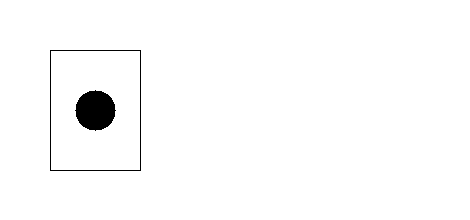

In [47]:
img5 = np.zeros( (220, 470, 3), np.uint8 ) 
img5.fill( 255 )

menum4=np.random.randint(0,8)
mecard4=marklist[menum4]
marklist.pop(menum4)

menum5=np.random.randint(0,7)
mecard5=marklist[menum5]
marklist.pop(menum5)

menum6=np.random.randint(0,6)
mecard6=marklist[menum6]
marklist.pop(menum6)

print('オープンした枚数新たなカードを配ります')
if first_open==0:
  print('オープンしませんでした')
elif first_open==1:
  print('カードを1枚配ります')
  cv2.rectangle(img5,(50,50),(140,170),color=(0))
  if mecard4=='○':
    make_circle(95,110,20,img5)
  elif mecard4=='□':
    make_rectangle(75,90,115,130,img5)
  elif mecard4=='↘︎':
    make_ya(75,90,115,130,img5)
  elif mecard4=='＋':
    make_pulus(95,90,95,130,75,110,115,110,img5)
  elif mecard4=='×':
    make_batsu(75,90,115,130,115,90,75,130,img5)
  cv2_imshow(img5)
elif first_open==2:
  print('カードを2枚配ります')
  for i in range(2):
    cv2.rectangle(img5,(50+140*i,50),(140+140*i,170),color=(0))
  if mecard4=='○':
    make_circle(95,110,20,img5)
  elif mecard4=='□':
    make_rectangle(75,90,115,130,img5)
  elif mecard4=='↘︎':
    make_ya(75,90,115,130,img5)
  elif mecard4=='＋':
    make_pulus(95,90,95,130,75,110,115,110,img5)
  elif mecard4=='×':
    make_batsu(75,90,115,130,115,90,75,130,img5)
  if mecard5=='○':
    make_circle(235,110,20,img5)
  elif mecard5=='□':
    make_rectangle(215,90,255,130,img5)
  elif mecard5=='↘︎':
    make_ya(215,90,255,130,img5)
  elif mecard5=='＋':
    make_pulus(235,90,235,130,215,110,255,110,img5)
  elif mecard5=='×':
    make_batsu(215,90,255,130,255,90,215,130,img5)
  cv2_imshow(img5)
else:
  print('カードを3枚配ります')
  for i in range(3):
    cv2.rectangle(img5,(50+140*i,50),(140+140*i,170),color=(0))
  if mecard4=='○':
    make_circle(95,110,20,img5)
  elif mecard4=='□':
    make_rectangle(75,90,115,130,img5)
  elif mecard4=='↘︎':
    make_ya(75,90,115,130,img5)
  elif mecard4=='＋':
    make_pulus(95,90,95,130,75,110,115,110,img5)
  elif mecard4=='×':
    make_batsu(75,90,115,130,115,90,75,130,img5)
  if mecard5=='○':
    make_circle(235,110,20,img5)
  elif mecard5=='□':
    make_rectangle(215,90,255,130,img5)
  elif mecard5=='↘︎':
    make_ya(215,90,255,130,img5)
  elif mecard5=='＋':
    make_pulus(235,90,235,130,215,110,255,110,img5)
  elif mecard5=='×':
    make_batsu(215,90,255,130,255,90,215,130,img5)
  if mecard6=='○':
    make_circle(375,110,20,img5)
  elif mecard6=='□':
    make_rectangle(355,90,395,130,img5)
  elif mecard6=='↘︎':
    make_ya(355,90,395,130,img5)
  elif mecard6=='＋':
    make_pulus(375,90,375,130,355,110,395,110,img5)
  elif mecard6=='×':
    make_batsu(355,90,395,130,395,90,355,130,img5)
  cv2_imshow(img5)


パソコンを共有してください
正解のカードのマークの番号を選んでください。
1:○
2:□
3:↘︎
4:＋
5:×
5
不正解。パソコンを後手の人に渡してください
オープンするカードの枚数を入力してください 3
パソコンを共有してください


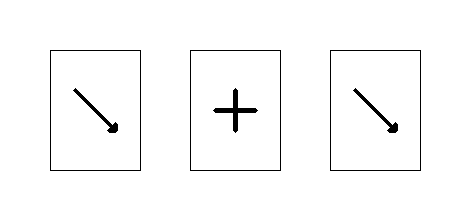

オープンしたカードを見せたらパソコンを後手の人に渡してください











オープンした枚数新たなカードを配ります
カードを3枚配ります


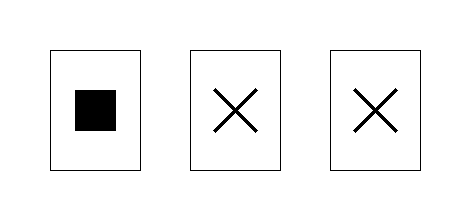

パソコンを共有してください
正解のカードのマークの番号を選んでください。
1:○
2:□
3:↘︎
4:＋
5:×
3
不正解。
正解のカードのマークの番号を選んでください。
1:○
2:□
3:↘︎
4:＋
5:×
1
不正解。
正解のカードのマークの番号を選んでください。
1:○
2:□
3:↘︎
4:＋
5:×
2
不正解。
正解のカードのマークの番号を選んでください。
1:○
2:□
3:↘︎
4:＋
5:×
4
正解
ゲーム終了。


In [48]:
img7 = np.zeros( (220, 470, 3), np.uint8 ) 
img7.fill( 255 )

younum4=np.random.randint(0,5)
youcard4=marklist[younum4]
marklist.pop(younum4)

younum5=np.random.randint(0,4)
youcard5=marklist[younum5]
marklist.pop(younum5)

younum6=np.random.randint(0,3)
youcard6=marklist[younum6]
marklist.pop(younum6)

print('パソコンを共有してください')
fans_1=int(input('正解のカードのマークの番号を選んでください。\n1:○\n2:□\n3:↘︎\n4:＋\n5:×\n'))   
while True:
  if fans_1==1:
    fans_1='○'
    if fans_1==ans:
      print('正解')
    else:
      print('不正解。パソコンを後手の人に渡してください')
    break
  elif fans_1==2:
    fans_1='□'
    if fans_1==ans:
      print('正解')
    else:
      print('不正解。パソコンを後手の人に渡してください')
    break
  elif fans_1==3:
    fans_1='↘︎'
    if fans_1==ans:
      print('正解')
    else:
      print('不正解。パソコンを後手の人に渡してください')
    break
  elif fans_1==4:
    fans_1='＋'
    if fans_1==ans:
      print('正解')
    else:
      print('不正解。パソコンを後手の人に渡してください')
    break
  elif fans_1==5:
    fans_1='×'
    if fans_1==ans:
      print('正解')
    else:
      print('不正解。パソコンを後手の人に渡してください')
    break
  else:
    continue

if fans_1==ans:
  print('ゲーム終了。')       
else: 
  img6 = np.zeros( (220, 470, 3), np.uint8 ) 
  img6.fill( 255 )
  while True:
    second_open=int(input('オープンするカードの枚数を入力してください '))
    if second_open==0:
      print('オープンしませんでした\n\n\n\n\n\n\n')
      break
    elif second_open==1:
      print('パソコンを共有してください')
      cv2.rectangle(img6,(50,50),(140,170),color=(0))
      if youcard1=='○':
        make_circle(95,110,20,img6)
      elif youcard1=='□':
        make_rectangle(75,90,115,130,img6)
      elif youcard1=='↘︎':
        make_ya(75,90,115,130,img6)
      elif youcard1=='＋':
        make_pulus(95,90,95,130,75,110,115,110,img6)
      elif youcard1=='×':
        make_batsu(75,90,115,130,115,90,75,130,img6)
      cv2_imshow(img4)
      print('オープンしたカードを見せたらパソコンを先手の人に渡してください\n\n\n\n\n\n\n\n\n\n\n')
      break
    elif second_open==2:
      print('パソコンを共有してください')
      for i in range(2):
        cv2.rectangle(img6,(50+140*i,50),(140+140*i,170),color=(0))   
      if youcard1=='○':
        make_circle(95,110,20,img6)
      elif youcard1=='□':
        make_rectangle(75,90,115,130,img6)
      elif youcard1=='↘︎':
        make_ya(75,90,115,130,img6)
      elif youcard1=='＋':
        make_pulus(95,90,95,130,75,110,115,110,img6)
      elif youcard1=='×':
        make_batsu(75,90,115,130,115,90,75,130,img6)
      if youcard2=='○':
        make_circle(235,110,20,img6)
      elif youcard2=='□':
        make_rectangle(215,90,255,130,img6)
      elif youcard2=='↘︎':
        make_ya(215,90,255,130,img6)
      elif youcard2=='＋':
        make_pulus(235,90,235,130,215,110,255,110,img6)
      elif youcard2=='×':
        make_batsu(215,90,255,130,255,90,215,130,img6)
      cv2_imshow(img6)
      print('オープンしたカードを見せたらパソコンを先手の人に渡してください\n\n\n\n\n\n\n\n\n\n\n')
      break
    elif second_open==3:
      print('パソコンを共有してください')
      cv2_imshow(img3)
      print('オープンしたカードを見せたらパソコンを後手の人に渡してください\n\n\n\n\n\n\n\n\n\n\n')
      break
    else:
      continue
  print('オープンした枚数新たなカードを配ります')
  if second_open==0:
    print('オープンしませんでした')
  elif second_open==1:
    print('カードを1枚配ります')
    cv2.rectangle(img7,(50,50),(140,170),color=(0))
    if youcard4=='○':
      make_circle(95,110,20,img7)
    elif youcard4=='□':
      make_rectangle(75,90,115,130,img7)
    elif youcard4=='↘︎':
      make_ya(75,90,115,130,img7)
    elif youcard4=='＋':
      make_pulus(95,90,95,130,75,110,115,110,img7)
    elif youcard4=='×':
      make_batsu(75,90,115,130,115,90,75,130,img7)
    cv2_imshow(img7)
  elif second_open==2:
    print('カードを2枚配ります')
    for i in range(2):
      cv2.rectangle(img7,(50+140*i,50),(140+140*i,170),color=(0))
    if youcard4=='○':
      make_circle(95,110,20,img7)
    elif youcard4=='□':
      make_rectangle(75,90,115,130,img7)
    elif youcard4=='↘︎':
      make_ya(75,90,115,130,img7)
    elif youcard4=='＋':
      make_pulus(95,90,95,130,75,110,115,110,img7)
    elif youcard4=='×':
      make_batsu(75,90,115,130,115,90,75,130,img7)
    if youcard5=='○':
      make_circle(235,110,20,img7)
    elif youcard5=='□':
      make_rectangle(215,90,255,130,img7)
    elif youcard5=='↘︎':
      make_ya(215,90,255,130,img7)
    elif youcard5=='＋':
      make_pulus(235,90,235,130,215,110,255,110,img7)
    elif youcard5=='×':
      make_batsu(215,90,255,130,255,90,215,130,img7)
    cv2_imshow(img7)
  else:
    print('カードを3枚配ります')
    for i in range(3):
      cv2.rectangle(img7,(50+140*i,50),(140+140*i,170),color=(0))
    if youcard4=='○':
      make_circle(95,110,20,img7)
    elif youcard4=='□':
      make_rectangle(75,90,115,130,img7)
    elif youcard4=='↘︎':
      make_ya(75,90,115,130,img7)
    elif youcard4=='＋':
      make_pulus(95,90,95,130,75,110,115,110,img7)
    elif youcard4=='×':
      make_batsu(75,90,115,130,115,90,75,130,img7)
    if youcard5=='○':
      make_circle(235,110,20,img7)
    elif youcard5=='□':
      make_rectangle(215,90,255,130,img7)
    elif youcard5=='↘︎':
      make_ya(215,90,255,130,img7)
    elif youcard5=='＋':
      make_pulus(235,90,235,130,215,110,255,110,img7)
    elif youcard5=='×':
      make_batsu(215,90,255,130,255,90,215,130,img7)
    if youcard6=='○':
      make_circle(375,110,20,img7)
    elif youcard6=='□':
      make_rectangle(355,90,395,130,img7)
    elif youcard6=='↘︎':
      make_ya(355,90,395,130,img7)
    elif youcard6=='＋':
      make_pulus(375,90,375,130,355,110,395,110,img7)
    elif youcard6=='×':
      make_batsu(355,90,395,130,395,90,355,130,img7)
    cv2_imshow(img7)                                            

  print('パソコンを共有してください')
  sans_1=int(input('正解のカードのマークの番号を選んでください。\n1:○\n2:□\n3:↘︎\n4:＋\n5:×\n')) 
  while True:
    if sans_1==1:
      sans_1='○'
      if sans_1==ans:
        print('正解。')
      else:
        print('不正解。')
      break
    elif sans_1==2:
      sans_1='□'
      if sans_1==ans:
        print('正解。')
      else:
        print('不正解。')
      break
    elif sans_1==3:
      sans_1='↘︎'
      if sans_1==ans:
        print('正解。')
      else:
        print('不正解。')
      break
    elif sans_1==4:
      sans_1='＋'
      if sans_1==ans:
        print('正解。')
      else:
        print('不正解。')
      break
    elif sans_1==5:
      sans_1='×'
      if sans_1==ans:
        print('正解。')
      else:
        print('不正解。')
      break
    else:
      continue
  if sans_1==ans:
    print('ゲーム終了。')
  else:                  
    while True:
      fans_1=int(input('正解のカードのマークの番号を選んでください。\n1:○\n2:□\n3:↘︎\n4:＋\n5:×\n'))   
      while True:
        if fans_1==1:
          fans_1='○'
          if fans_1==ans:
            print('正解')
          else:
            print('不正解。')
          break
        elif fans_1==2:
          fans_1='□'
          if fans_1==ans:
            print('正解')
          else:
            print('不正解。')
          break
        elif fans_1==3:
          fans_1='↘︎'
          if fans_1==ans:
            print('正解')
          else:
            print('不正解。')
          break
        elif fans_1==4:
          fans_1='＋'
          if fans_1==ans:
            print('正解')
          else:
            print('不正解。')
          break
        elif fans_1==5:
          fans_1='×'
          if fans_1==ans:
            print('正解')
          else:
            print('不正解。')
          break
        else:
          continue
      if fans_1==ans:
        print('ゲーム終了。')
        break
      else:
        sans_1=int(input('正解のカードのマークの番号を選んでください。\n1:○\n2:□\n3:↘︎\n4:＋\n5:×\n')) 
        while True:
          if sans_1==1:
            sans_1='○'
            if sans_1==ans:
              print('正解。')
            else:
              print('不正解。')
            break
          elif sans_1==2:
            sans_1='□'
            if sans_1==ans:
              print('正解。')
            else:
              print('不正解。')
            break
          elif sans_1==3:
            sans_1='↘︎'
            if sans_1==ans:
              print('正解。')
            else:
              print('不正解。')
            break
          elif sans_1==4:
            sans_1='＋'
            if sans_1==ans:
              print('正解。')
            else:
              print('不正解。')
            break
          elif sans_1==5:
            sans_1='×'
            if sans_1==ans:
              print('正解。')
            else:
              print('不正解。')
            break
          else:
            continue
      if sans_1==ans:
        print('ゲーム終了。')
      else:
        continue

        